# Step 1 : Installation and Setup

## Installing Tensorflow


In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf


In [3]:
tf.__version__

'2.13.0'

## Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [5]:
# importing the dataset
from tensorflow.keras.datasets import cifar10

In [6]:
# load the dataset
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

In [7]:
class_names = ["0: airplane", 
"1: automobile",
"2: bird" ,
"3: cat" ,
"4: deer" ,
'5: dog' ,
'6: frog' ,
'7: horse' ,
'8: ship' ,
'9: truck']

In [8]:
class_names

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: ship',
 '9: truck']

In [9]:
x_train.max(),x_train.min(),x_train.mean()

(255, 0, 120.70756512369792)

In [10]:
y_train.max(),y_train.min(),y_train.mean()

(9, 0, 4.5)

In [11]:
#normalizing the images
x_train=x_train/255
x_test=x_test/255

In [12]:
x_train.max(),x_train.min(),x_train.mean()

(1.0, 0.0, 0.4733630004850874)

In [13]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

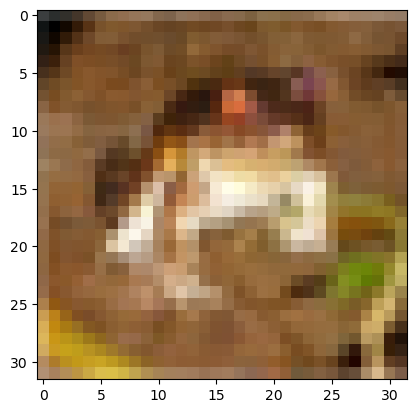

In [14]:
plt.imshow(x_train[0])

In [15]:
y_train[0]

array([6], dtype=uint8)

In [16]:
class_names

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: ship',
 '9: truck']

# Building the CNN

In [17]:
# Defining the object

In [18]:
model= tf.keras.models.Sequential()

In [19]:
#ADDING the first CNN layer
#1)filters(kernels)=32
#2)kernel size =3 
#3)padding = same
#4)activation function = relu
#5)input shape = (32,32,3)
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=[32,32,3]))

In [20]:
#Adding the second CNN layer and maxpool layer
#1)filters(kernels)=32
#2)kernel size =3 
#3)padding = same
#4)activation function = relu
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))

# maxpool layer parameters
#1)pool_size =2
#2)strides = 2
#3)padding= valid
model.add(tf.keras.layers.MaxPool2D(pool_size =2,strides = 2,padding= "valid"))

In [21]:
# Adding third CNN layer
#1)filters(kernels)=64
#2)kernel size =3 
#3)padding = same
#4)activation function = relu
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))

In [22]:
#Adding the Fourth CNN layer and Second maxpool layer
#1)filters(kernels)=64
#2)kernel size =3 
#3)padding = same
#4)activation function = relu
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))

# maxpool layer parameters
#1)pool_size =2
#2)strides = 2
#3)padding= valid
model.add(tf.keras.layers.MaxPool2D(pool_size =2,strides = 2,padding= "valid"))

In [23]:
# Adding the dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [24]:
# Adding the Flattening layer
model.add(tf.keras.layers.Flatten())

In [25]:
#Adding first dense layer
model.add(tf.keras.layers.Dense(units=128,activation="relu"))

In [26]:
#Adding second dense layer(OUTPUT)
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

# Step 4: Training the model

In [28]:
#compiling the model
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["sparse_categorical_accuracy"])

In [29]:
model.fit(x_train,y_train,batch_size=10,epochs=10)

Epoch 1/10
5000/5000 [==============================] - 104s 21ms/step - loss: 1.3487 - sparse_categorical_accuracy: 0.5109
Epoch 2/10
5000/5000 [==============================] - 107s 21ms/step - loss: 0.9779 - sparse_categorical_accuracy: 0.6562
Epoch 3/10
5000/5000 [==============================] - 109s 22ms/step - loss: 0.8429 - sparse_categorical_accuracy: 0.7035
Epoch 4/10
5000/5000 [==============================] - 116s 23ms/step - loss: 0.7572 - sparse_categorical_accuracy: 0.7339
Epoch 5/10
5000/5000 [==============================] - 111s 22ms/step - loss: 0.6968 - sparse_categorical_accuracy: 0.7558
Epoch 6/10
5000/5000 [==============================] - 115s 23ms/step - loss: 0.6472 - sparse_categorical_accuracy: 0.7710
Epoch 7/10
5000/5000 [==============================] - 117s 23ms/step - loss: 0.6091 - sparse_categorical_accuracy: 0.7863
Epoch 8/10
5000/5000 [==============================] - 120s 24ms/step - loss: 0.5657 - sparse_categorical_accuracy: 0.7999
Epoch 9/

# Model Evaluation and Prediction

In [30]:
# evaluate the model performance

In [31]:
test_loss,test_accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.7483 - sparse_categorical_accuracy: 0.7550


In [33]:
print('Test Accuracy is: {}'.format(test_accuracy))

Test Accuracy is: 0.7549999952316284


In [36]:
# Model prediction
y_pred_probs = model.predict(x_test)  # Get predicted probabilities for each class

# Extract the class with the highest probability as the predicted class
y_pred = np.argmax(y_pred_probs, axis=-1)


313/313 [==============================] - 5s 16ms/step


In [37]:
print(y_pred[0]), print(y_test[0])

3
[3]


(None, None)

In [38]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[803   5  48  11  27   5  12  10  42  37]
 [ 16 869   2   2   6   6   9   3  17  70]
 [ 72   2 570  30 109  54  96  41  16  10]
 [ 20   4  56 445  90 149 137  66  16  17]
 [ 19   4  28  29 735  25  82  72   6   0]
 [  8   1  32 110  49 676  46  61   5  12]
 [  8   4  20  27  20  14 894   4   7   2]
 [ 14   1  24  20  43  37   8 836   3  14]
 [ 51  27   8   6   4   3   7   6 867  21]
 [ 20  64   5   7   3   4   5  12  25 855]]


In [39]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.755
